# N-body simulator

In this notebook, we explore the dynamics of n-body systems. We will be primarily using the `NBodyHandler` class, which has an associated `.py` file in this repository. 

Ben Hughes, Physics 5300

## Derivation of the mechanics

<img src="images/diagram.jpeg" alt="Simple diagram of n-body problem" width="400"/>

In the n-body problem, we imagine that we have $N$ bodies of variable mass $m_i$, each of which is gravitationally attracted to every other mass with the typical Newtonian gravitational interaction:
$$F_{ij} = -\frac{Gm_im_j}{r_{ij}^2}$$
We will model the dynamics of this problem with a Hamiltonian approach. In order to keep things simple, we will also restrict ourselves to two dimensions.

Every particle is described by a pair of coordinates $x_i, y_i$ and a corresponding pair of momenta $p_{xi}, p_{yi}$. The total kinetic energy of the system is therefore
$$T = \sum_{i=1}^{N} \frac{1}{2}m_i(\dot{x}_i^2 + \dot{y}_i^2) = \sum_{i=1}^N \frac{p_{xi}^2 + p_{yi}^2}{2m_i}$$
From the force law above, the gravitational interaction has a potential
$$U_{ij} = -\frac{Gm_im_j}{r_{ij}}$$
and so our total potential energy, expressed in terms of our coordinates, is
$$U = -\sum_{i,j, i\neq j}^N \frac{Gm_im_j}{\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}}$$
Here, this is a sum over all $i,j$ taking $i\neq j$. Our coordinates are all natural, so we don't need to compute the Langrangian first, but for completeness, the Lagrangian is
$$L = T - U = \sum_{i=1}^N \frac{p_{xi}^2 + p_{yi}^2}{2m_i} + \sum_{i,j, i\neq j}^N \frac{Gm_im_j}{\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}}$$
so our Hamiltonian is
$$
\begin{align*}
    H &= \sum_{i=1}^N (p_{xi} \dot{x}_i + p_{yi} \dot{y}_i) - L \\
    &= \sum_{i=1}^N (p_{xi} \dot{x}_i + p_{yi} \dot{y}_i) - \sum_{i=1}^N \frac{p_{xi}^2 + p_{yi}^2}{2m_i} - \sum_{i,j, i\neq j}^N \frac{Gm_im_j}{\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}} \\
    &=\sum_{i=1}^N \frac{p_{xi}^2 + p_{yi}^2}{2m_i} -\sum_{i,j, i\neq j}^N \frac{Gm_im_j}{\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}}
\end{align*}
$$
where we've used the fact that $p_i\dot{q}_i = 2T_i$, where $q$ is one of the coordinates and $T_i$ is the corresponding term of the kinetic energy for that coordinate.

Hamilton's equations are then
$$
\dot{x}_i = \frac{\partial H}{\partial p_{xi}} = \frac{p_{xi}}{m_i} \qquad \dot{y}_i = \frac{\partial H}{\partial p_{yi}} = \frac{p_{yi}}{m_i}
$$
and
$$
\begin{align*}
\dot{p}_{xi} &= -\frac{\partial H}{\partial x_i} = -Gm_i \sum_{j=1}^N \frac{x_i - x_j}{[(x_i-x_j)^2 + (y_i - y_j)^2]^{3/2}} \\
\dot{p}_{yi} &= -\frac{\partial H}{\partial y_i} = -Gm_i \sum_{j=1}^N \frac{y_i - y_j}{[(x_i-x_j)^2 + (y_i - y_j)^2]^{3/2}}
\end{align*}
$$
These are the basic equations of motion that we integrate.

## Symmetries and assumptions

We're restricting our considerations to only 2-dimensions -- not because higher dimensions doesn't work (it super does), but just for simplicity. We're also assuming our particles are points, and don't have any extent. There is (optionally) a parameter in the class that you can pass which adds a constant effective offset between particles to prevent singularities -- so this is something *like* an effective radius, but not quite.

N-body simulations feature exactly zero constraint forces, so all of the forces on the system are internal. A consequence of this is that the total linear momentum of the system is conserved (which will be demonstrated later). This can also be seen from the form of the Hamiltonian -- since we have translational symmetry (because only relative distances matter in the potential), linear momentum is automatically conserved.

Additionally, since all forces are radially directed towards the barycenter of the system, which is necessarily moving at a constant velocity (because linear momentum is conserved), angular momentum is also conserved. Relative to the CM, our Hamiltonian would look like
$$
    H =\sum_{i=1}^N \frac{p_{xi}^2 + p_{yi}^2}{2m_i} -\sum_{i,j, i\neq j}^N \frac{Gm_im_j}{r}
$$
where $r$ is measured relative to the CM. Since the angular coordinate $\phi$ appears nowhere in this Hamiltonian, it is an ignorable coordinate. We therefore have rotational symmetry and angular momentum is conserved.

Finally, energy/the Hamiltonian is conserved. This is due to the fact that we have no explicit time dependence in the Lagrangian, and therefore we have another symmetry in time and energy is conserved. 

## Implementation
In the class implementation, we are essentially solving the equation
$$
\frac{d}{dt} \begin{pmatrix}
    x_1 \\
    y_1 \\
    \vdots \\
    x_N \\
    y_N \\
    p_{x1} \\
    p_{y1} \\
    \vdots \\
    p_{xN} \\
    p_{yN}
\end{pmatrix} = \begin{pmatrix}
    p_{x1}/m_1 \\
    p_{y1}/m_1 \\
    \vdots \\
    p_{xN}/m_N \\
    p_{yN}/m_N \\
    -Gm_1 \sum_{j=1}^N \frac{x_1 - x_j}{[(x_1-x_j)^2 + (y_1 - y_j)^2]^{3/2}} \\
    -Gm_1 \sum_{j=1}^N \frac{y_1 - y_j}{[(x_1-x_j)^2 + (y_1 - y_j)^2]^{3/2}} \\
    \vdots \\
    -Gm_N \sum_{j=1}^N \frac{x_N - x_j}{[(x_N-x_j)^2 + (y_N - y_j)^2]^{3/2}} \\
    -Gm_N \sum_{j=1}^N \frac{y_N - y_j}{[(x_N-x_j)^2 + (y_N - y_j)^2]^{3/2}}
\end{pmatrix}
$$
Since this is simply an equation of the form $d\vec{x}/dt = f(\vec{x},y)$, so we have a variety of integrators at our disposal to integrate the problem. In the class, I have explicitly written the integrators for Euler, leapfrog, and the 4th order Yoshida/leapfrog integrator. We also have access to the RK45 integrator from `scipy.integrate`'s `solve_ivp`.

## Visualizations

**IMPORTANT NOTE**: Some of these animations take a while to render -- be patient, it should all work. On my macbook, some of these cells take around 30 seconds to finish. Also, you *may* need FFmpeg installed in order for the animations to be saved correctly, but I'm not sure.

Here, I'm going to demonstrate that this class works and make some simple plots.

The first plot is just a simple two-body system with equal masses:

In [27]:
# import libs
import matplotlib.pyplot as plt
from matplotlib import animation as anim
from NBodyHandler import *
import numpy as np
from IPython.display import Video, Image

In [28]:
%%capture
# initalize particles
mass_array = [1, 1]
position_array = [
    [0, 0],
    [1, 0]
]
velocity_array = 0.5*np.array([
    [0, -1],
    [0, 1]
])

# initialize the NBodyHandler
nbody = NBodyHandler(mass_array, position_array, velocity_array)

# create time arrays and solve using leapfrog4
tlist = np.arange(0,3,0.01)
t, vec = nbody.solve(tlist, method="Leapfrog4")

# plot
fig, ax = plt.subplots(dpi=150,figsize=(6,4))

points_arr = []
for idx in range(0, len(mass_array)):
    point = ax.plot(vec[2*idx,0], vec[2*idx+1,0],'-', label=rf"$m_{idx} = {mass_array[idx]}$")[0]
    points_arr.append(point)

# make the animation
def update(frame):
    for idx in range(0, len(mass_array)):
        points_arr[idx].set_xdata(vec[2*idx, :frame])
        points_arr[idx].set_ydata(vec[2*idx+1, :frame])
    return points_arr

ax.legend(loc="upper left")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Two body system with equal masses")
ax.set_xlim(-0.25, 1.25)
ax.set_ylim(-1, 1)

anim.FuncAnimation(fig=fig, func=update, frames=len(tlist),
                   repeat=True, blit=True
                   ).save(
                        "images/two_body_equal.mp4", 
                        writer="ffmpeg", fps=60
                        )


In [29]:
Video("images/two_body_equal.mp4")

As you can see, the code works! We can see the elliptical orbit, and how the masses exchange their kinetic and potential energies as they aproach each other. Also, we can see that closed orbits are formed (which means our error is low).

Below is a plot of the vector field of the forces given the initial conditions above (except centered around the origin). This was actually surprisingly hard to do.

In [30]:
%%capture
# initalize particles
mass_array = [1, 1]
position_array = [
    [-0.5, 0],
    [0.5, 0]
]
velocity_array = [
    [0.5, -0.5],
    [0.5, 0.5]
]

# get grid of points centered at 0
grid_dim = 20
grid_size = 2
dx = grid_size/grid_dim
grid = np.zeros((grid_dim, grid_dim, 2)) # store pos at each point
for i in range(0, grid_dim):
    for j in range(0, grid_dim):
        grid[i][j][0] = dx*i - grid_size/2 + dx/2
        grid[i][j][1] = dx*j - grid_size/2 + dx/2

# make grid of arrows and populate with the force
arrow_grid = np.zeros((grid_dim, grid_dim, 2))
for i in range(0, grid_dim):
    for j in range(0, grid_dim):

        # reinitialize NBodyHandler with new test particle
        m_arr = mass_array.copy()
        pos_arr = position_array.copy()
        vel_arr = velocity_array.copy()

        m_arr.append(1)
        pos_arr.append([grid[i][j][0], grid[i][j][1]])
        vel_arr.append([0, 0])
        nbody = NBodyHandler(m_arr, pos_arr, vel_arr)

        # check distance from arrow origin to closest body
        radii = []
        gx = grid[i][j][0] #grid x
        gy = grid[i][j][1] #grid y
        for idx in range(0,len(mass_array)):
            bx = pos_arr[idx][0] #body x
            by = pos_arr[idx][1] #body y
            r = np.sqrt((bx - gx)**2 + (by - gy)**2) #distance
            radii.append(r)

        # if too close to body, set to arrow zero
        r_cutoff = 0.3
        if min(radii) < r_cutoff:
            arrow_grid[i][j][0] = 0
            arrow_grid[i][j][1] = 0
        else:
            arrow_grid[i][j][0] = nbody.get_rhs(0, nbody.fvec)[-2]
            arrow_grid[i][j][1] = nbody.get_rhs(0, nbody.fvec)[-1]

# plot grid of arrows
fig, ax = plt.subplots()

q = ax.quiver(grid[:,:,0], grid[:,:,1], arrow_grid[:,:,0], arrow_grid[:,:,1])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Force vector field around two equal masses")

fig.savefig("images/twobody_field.png", dpi = 150)

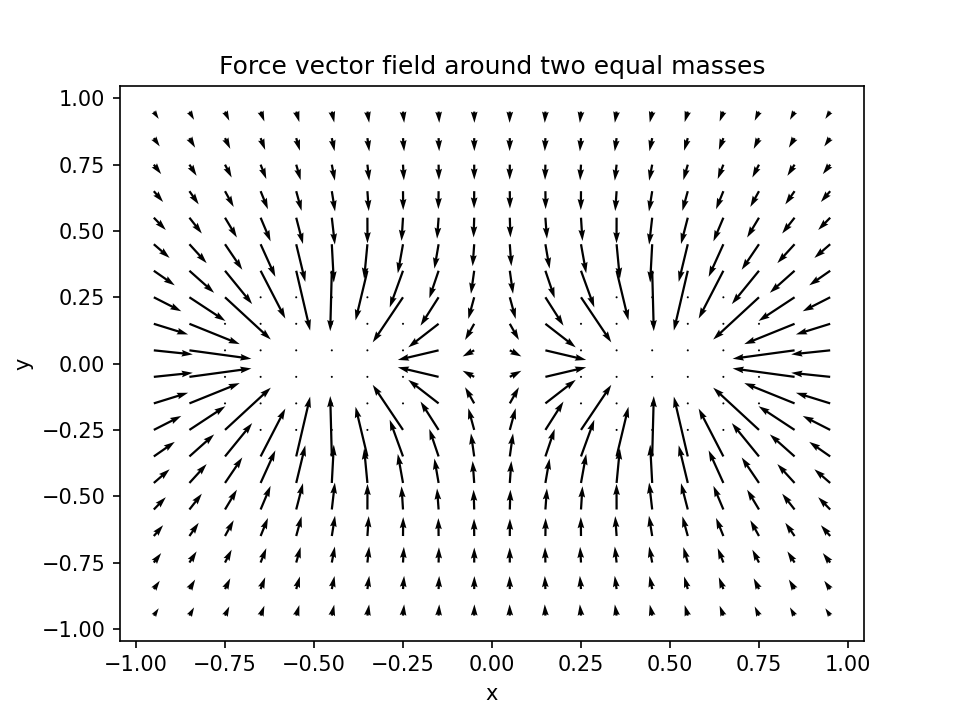

In [31]:
Image("images/twobody_field.png")

For fun, here's another one with more masses:

In [32]:
%%capture
# initalize particles
m=10
mass_array = [m, m, m, m]
position_array = [
    [-0.75, -0.75],
    [0.75, -0.75],
    [-0.75, 0.75],
    [0.75, 0.75]
]
velocity_array = [
    [0.5, -0.5],
    [0.5, 0.5],
    [0, 0],
    [0, 0]
]

# get grid of points centered at 0
grid_dim = 20
grid_size = 3
dx = grid_size/grid_dim
grid = np.zeros((grid_dim, grid_dim, 2)) # store pos at each point
for i in range(0, grid_dim):
    for j in range(0, grid_dim):
        grid[i][j][0] = dx*i - grid_size/2 + dx/2
        grid[i][j][1] = dx*j - grid_size/2 + dx/2

# make grid of arrows and populate with the force
arrow_grid = np.zeros((grid_dim, grid_dim, 2))
for i in range(0, grid_dim):
    for j in range(0, grid_dim):

        # reinitialize NBodyHandler with new test particle
        m_arr = mass_array.copy()
        pos_arr = position_array.copy()
        vel_arr = velocity_array.copy()

        m_arr.append(1)
        pos_arr.append([grid[i][j][0], grid[i][j][1]])
        vel_arr.append([0, 0])
        nbody = NBodyHandler(m_arr, pos_arr, vel_arr)

        # check distance from arrow origin to closest body
        radii = []
        gx = grid[i][j][0] #grid x
        gy = grid[i][j][1] #grid y
        for idx in range(0,len(mass_array)):
            bx = pos_arr[idx][0] #body x
            by = pos_arr[idx][1] #body y
            r = np.sqrt((bx - gx)**2 + (by - gy)**2) #distance
            radii.append(r)

        # if too close to body, set to arrow zero
        r_cutoff = 0.4
        if min(radii) < r_cutoff:
            arrow_grid[i][j][0] = 0
            arrow_grid[i][j][1] = 0
        else:
            arrow_grid[i][j][0] = nbody.get_rhs(0, nbody.fvec)[-2]
            arrow_grid[i][j][1] = nbody.get_rhs(0, nbody.fvec)[-1]

# plot grid of arrows
fig, ax = plt.subplots()

q = ax.quiver(grid[:,:,0], grid[:,:,1], arrow_grid[:,:,0], arrow_grid[:,:,1])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Force vector field around four equal masses")

fig.savefig("images/fourbody_field.png", dpi = 150)

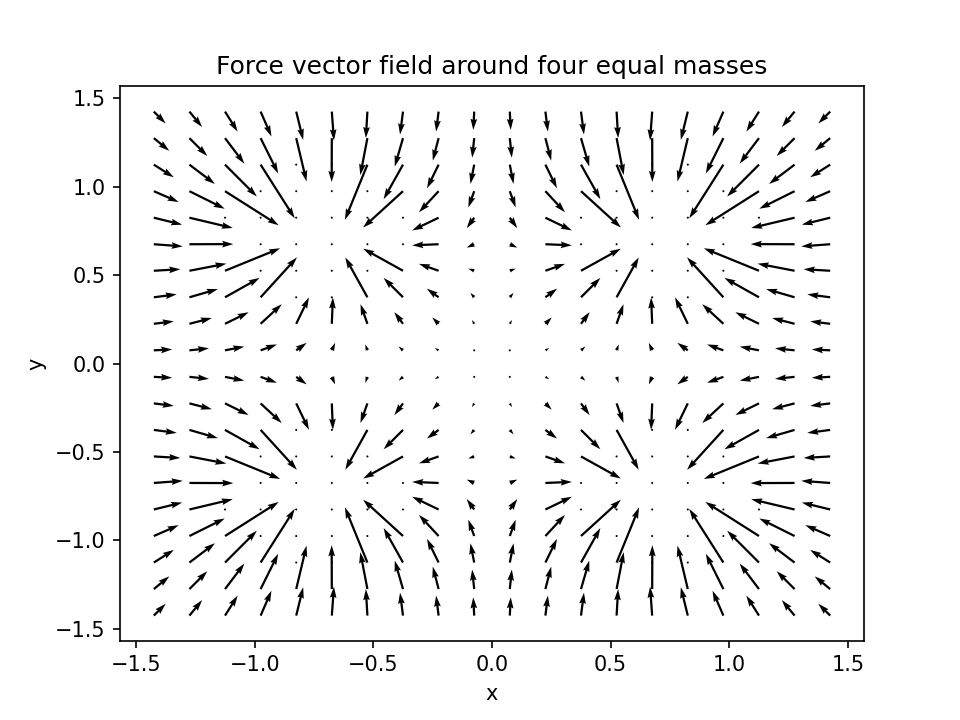

In [33]:
Image("images/fourbody_field.png")

## Conserved quantities

As we've previously discussed, this system is highly symmetric, and so we have several conserved quantities. Below is a plot of three such conserved quantities -- energy, linear momentum, and angular momentum -- for the first two-body problem we looked at.

In [34]:
%%capture
# initalize particles
mass_array = [1, 1]
position_array = [
    [0, 0],
    [1, 0]
]
velocity_array = 0.5*np.array([
    [0, -1],
    [0, 1]
])

# initialize the NBodyHandler
nbody = NBodyHandler(mass_array, position_array, velocity_array)

# create time arrays and solve using leapfrog4
tlist = np.arange(0,7,0.01)
t, vec = nbody.solve(tlist, method="Leapfrog4")

# plot
fig, axs = plt.subplots(3, 1, figsize=(6,8))

axs[0].plot(tlist, nbody.H, label="Hamiltonian")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("H")
axs[0].set_title("Hamiltonian")

axs[1].plot(tlist, nbody.L, label="Angular momentum")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("L")
axs[1].set_title("Angular momentum")

axs[2].plot(tlist, np.sqrt(nbody.P[0]**2 + nbody.P[1]**2), label="Linear momentum")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("P")
axs[2].set_title("Linear momentum")

fig.suptitle("Conserved quantities in two-body system")
fig.tight_layout()

fig.savefig("images/twobody_conserved_good.png", dpi = 150)

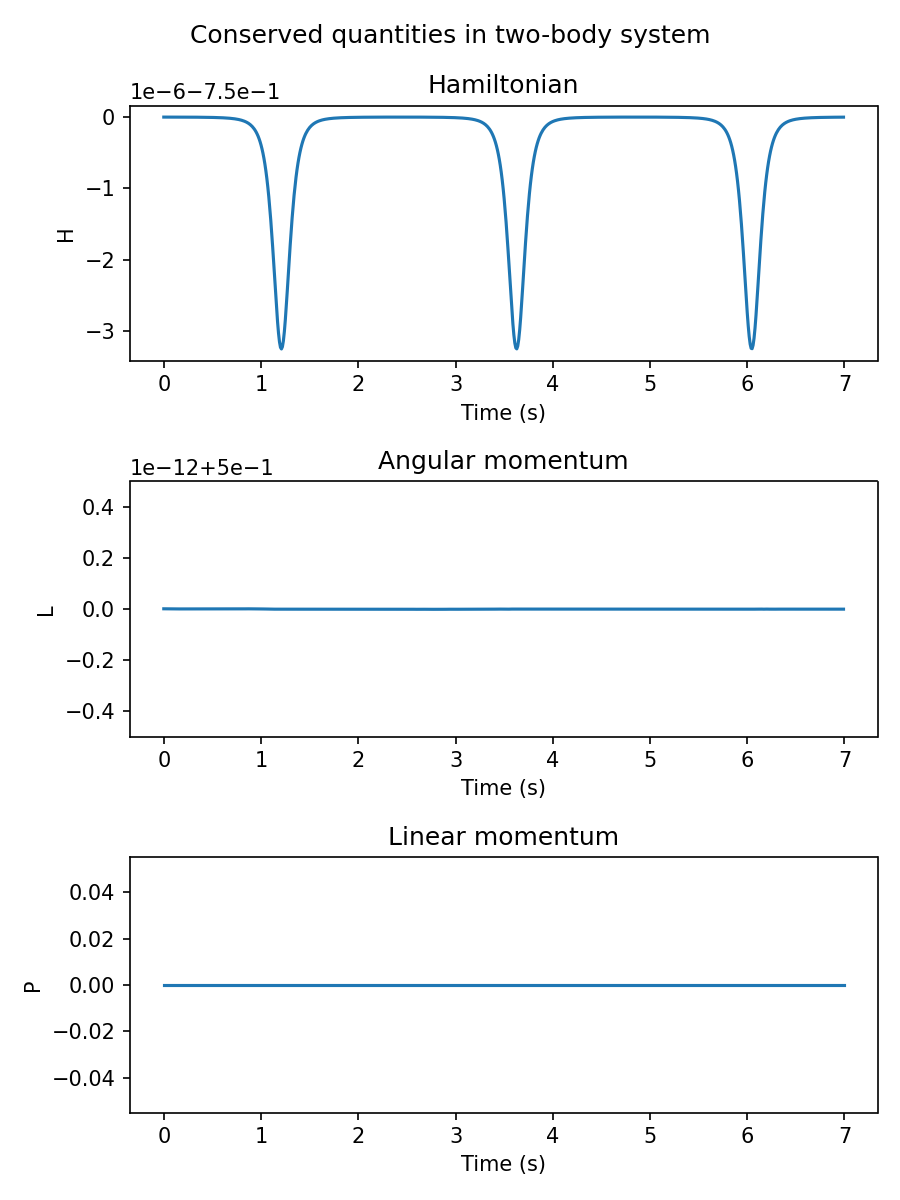

In [35]:
Image("images/twobody_conserved_good.png")

Pay close attention to the Hamiltonian subplot: the units are in millionths. All of these quantities are evidently conserved. Here's the same plot for a more complicated three-body system.

In [36]:
%%capture
# initalize particles
mass_array = [1, 1, 1]
position_array = [
    [0, 0],
    [1, 0],
    [2, 1]
]
velocity_array = 0.5*np.array([
    [0, -1],
    [0, 1],
    [0, 1]
])

# initialize the NBodyHandler
nbody = NBodyHandler(mass_array, position_array, velocity_array)

# create time arrays and solve using leapfrog4
tlist = np.arange(0,7,0.01)
t, vec = nbody.solve(tlist, method="Leapfrog4")

# plot
fig, axs = plt.subplots(3, 1, figsize=(6,8))

axs[0].plot(tlist, nbody.H, label="Hamiltonian")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("H")
axs[0].set_title("Hamiltonian")

axs[1].plot(tlist, nbody.L, label="Angular momentum")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("L")
axs[1].set_title("Angular momentum")

axs[2].plot(tlist, np.sqrt(nbody.P[0]**2 + nbody.P[1]**2), label="Linear momentum")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("P")
axs[2].set_title("Linear momentum")

fig.suptitle("Conserved quantities in two-body system")
fig.tight_layout()

fig.savefig("images/twobody_conserved_bad.png", dpi = 150)

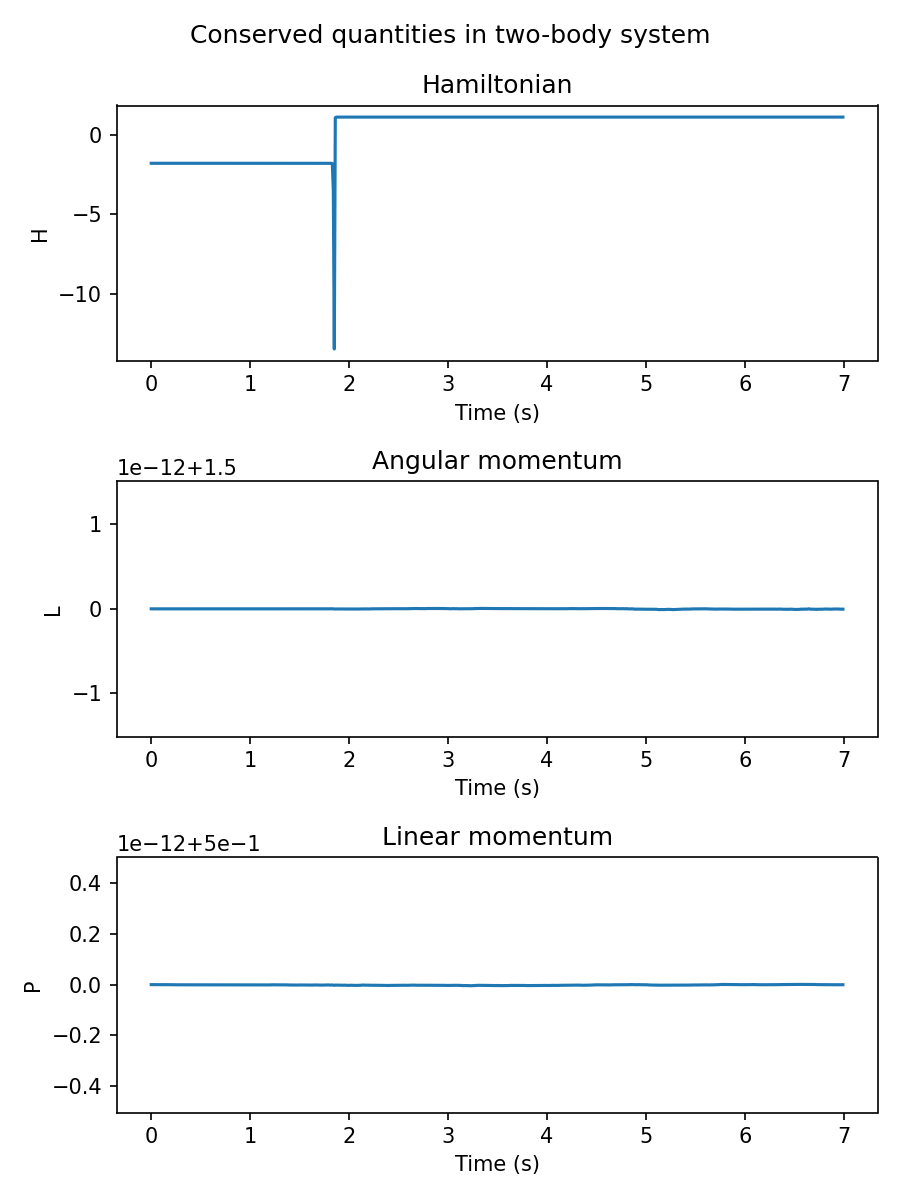

In [37]:
Image("images/twobody_conserved_bad.png")

What happened to our conserved quantities? Let's look at an animation.

In [38]:
%%capture
# initalize particles
mass_array = [1, 1, 1]
position_array = [
    [0, 0],
    [1, 0],
    [2, 1]
]
velocity_array = 0.5*np.array([
    [0, -1],
    [0, 1],
    [0, 1]
])


# initialize the NBodyHandler
nbody = NBodyHandler(mass_array, position_array, velocity_array)

# create time arrays and solve using leapfrog4
tlist = np.arange(0,4,0.01)
t, vec = nbody.solve(tlist, method="Leapfrog4")

# plot
fig, ax = plt.subplots(dpi=150)

points_arr = []
for idx in range(0, len(mass_array)):
    point = ax.plot(vec[2*idx,0], vec[2*idx+1,0],'-', label=rf"$m_{idx} = {mass_array[idx]}$")[0]
    points_arr.append(point)

# make the animation
def update(frame):
    for idx in range(0, len(mass_array)):
        points_arr[idx].set_xdata(vec[2*idx, :frame])
        points_arr[idx].set_ydata(vec[2*idx+1, :frame])
    return points_arr

ax.legend(loc="upper left")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Three body system -- collision")
ax.set_xlim(-0.25, 2.25)
ax.set_ylim(-1, 2.25)

anim.FuncAnimation(fig=fig, func=update, frames=len(tlist),
                   repeat=True, blit=True
                   ).save(
                        "images/three_body_collision.mp4", 
                        writer="ffmpeg", fps=60
                        )


In [39]:
Video("images/three_body_collision.mp4")

For most arbitrary configurations of the n-body system, you wil eventually encounter some singularity when the masses pass too close to each other. That's what happened here -- one of the masses collided with another. Even for this pretty good integrator (more on that later), the Hamiltonian can't be conserved with the masses pass through each other. 

What about the other two quantities? As it turns out, these quantities are incredibly stable, even when round off error is extreme. This is due to the intrinsic symmetries of the problem. Imagine we have a collision: if one mass is propelled off at a high speed due to rounding error, the other mass is propelled in the opposite direction with the opposite momentum. This preserves the overall momentum and angular momentum, even when energy is not conserved.

## Integrators/advanced numerical approaches

In this section, we consider integrators of the form $d\mathbf{y}/dt = \mathbf{f}(t,y)$ (the bold indicates vectors).

To achieve the animations in this project (again, later), we need very good integrators. The simplest integrator is the Euler integrator:
$$
\mathbf{y}_{i+1} = \mathbf{y}_i + \mathbf{f}(t,\mathbf{y})\Delta t
$$
This is a plot using the Euler integrator, using the two-body system, under the same conditions as in the first plot:


In [40]:
%%capture
# initalize particles
mass_array = [1, 1]
position_array = [
    [0, 0],
    [1, 0]
]
velocity_array = 0.5*np.array([
    [0, -1],
    [0, 1]
])

# initialize the NBodyHandler
nbody = NBodyHandler(mass_array, position_array, velocity_array)

# create time arrays and solve using leapfrog4
tlist = np.arange(0,6,0.01)
t, vec = nbody.solve(tlist, method="Euler")

# plot
fig, ax = plt.subplots(dpi=200)

points_arr = []
for idx in range(0, len(mass_array)):
    point = ax.plot(vec[2*idx,0], vec[2*idx+1,0],'-', label=rf"$m_{idx} = {mass_array[idx]}$")[0]
    points_arr.append(point)

# make the animation
def update(frame):
    for idx in range(0, len(mass_array)):
        points_arr[idx].set_xdata(vec[2*idx, :frame])
        points_arr[idx].set_ydata(vec[2*idx+1, :frame])
    return points_arr

ax.legend(loc="upper left")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Two body system: Euler")
ax.set_xlim(-0.75, 1.75)
ax.set_ylim(-0.75, 0.75)

anim.FuncAnimation(fig=fig, func=update, frames=len(tlist),
                   repeat=True, blit=True
                   ).save(
                        "images/two_body_euler.mp4", 
                        writer="ffmpeg", fps=60
                        )

In [41]:
Video("images/two_body_euler.mp4")

As we can see, it's really bad. The form of the integrator always means that the function changes slower than it needs to. When the step size is extremely small the integrator improves, but we begin running into roundoff errors by the time we can achieve really good precision.

One improvement upon the Euler integrator is the leapfrog integrator (here, we reformulate the standard form to be in terms of the coordinates $q_i$ and the momenta $p_i$):
$$
\begin{align*}
\mathbf{p}_{i+1/2} &= \mathbf{p}_i + \frac{1}{2} \frac{d\mathbf{p}}{dt}\bigg|_i \Delta t \\
\mathbf{x}_{i+1} &= \mathbf{x}_i + \frac{d\mathbf{x}}{dt}\bigg|_{i+1/2} \Delta t \\
\mathbf{p}_{i+1} &= \mathbf{p}_{i+1/2} + \frac{1}{2} \frac{d\mathbf{p}}{dt}\bigg|_{i+1} \Delta t
\end{align*}
$$
The leapfrog integrator has error of order $O(\Delta t^2)$, which is a big improvement over Euler (being only first order). The leapfrog integrator is, even more importantly, symplectic (i.e. energy conserving). This makes it much better suited to oscillatory behavior (like we encounter in n-body simulations). Below is the same plot with leapfrog (although not animated):

In [42]:
%%capture
# initalize particles
mass_array = [1, 1]
position_array = [
    [0, 0],
    [1, 0]
]
velocity_array = 0.5*np.array([
    [0, -1],
    [0, 1]
])

# initialize the NBodyHandler
nbody = NBodyHandler(mass_array, position_array, velocity_array)

# create time arrays and solve using leapfrog
tlist = np.arange(0,6,0.01)
t, vec = nbody.solve(tlist, method="Leapfrog")

# plot
fig, ax = plt.subplots()

ax.plot(vec[0], vec[1], label="mass 1")
ax.plot(vec[2], vec[3], label="mass 2")

ax.legend(loc="upper left")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Two body system -- Leapfrog")

fig.savefig("images/twobody_equalmass_leapfrog.png", dpi = 150)

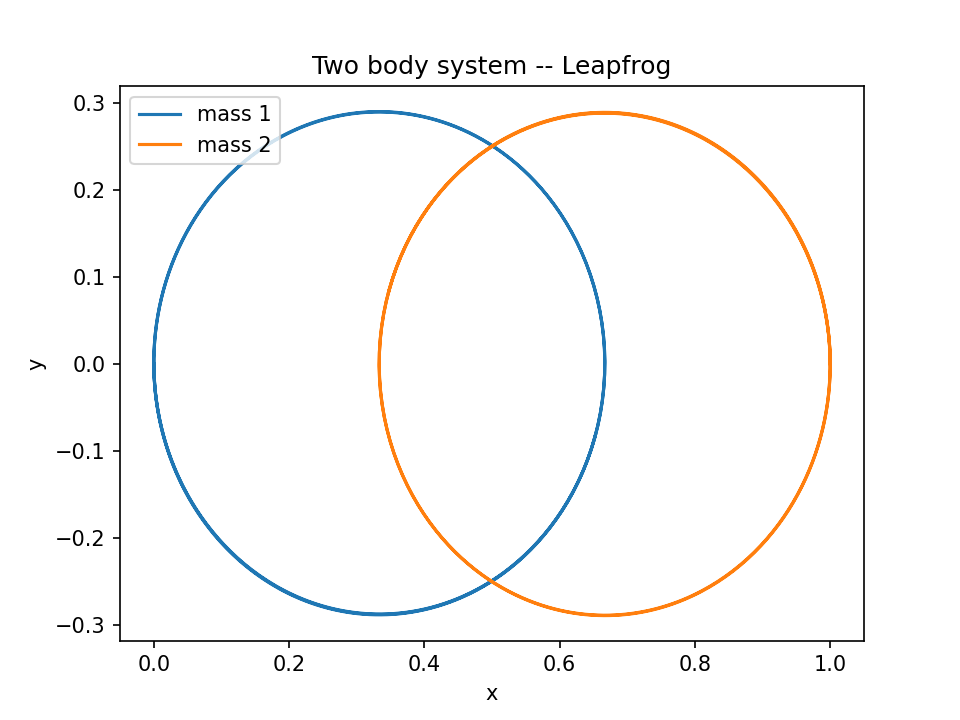

In [43]:
Image("images/twobody_equalmass_leapfrog.png")

The improvement is obvious. Leapfrog can actually be improved further with Yoshida coefficients. Below is an implementation of a fourth-order leapfrog, which is also implemented in the code. Below, $x_i^1, x_i^2$, and similarly defined variables are intermediate steps in the process:
$$
\begin{align*}
\mathbf{x}_i^1 = \mathbf{x}_i + c_1 \frac{d\mathbf{x}_i}{dt}\Delta t &\qquad \mathbf{p}_i^1 = \mathbf{p}_i + d_1 \frac{d\mathbf{p}_i^1}{dt}\Delta t \\
\mathbf{x}_i^2 = \mathbf{x}_i^1 + c_2 \frac{d\mathbf{x}_i^1}{dt}\Delta t &\qquad \mathbf{p}_i^2 = \mathbf{p}_i^1 + d_2 \frac{d\mathbf{p}_i^2}{dt}\Delta t \\
\mathbf{x}_i^3 = \mathbf{x}_i^2 + c_3 \frac{d\mathbf{x}_i^2}{dt}\Delta t &\qquad \mathbf{p}_i^3 = \mathbf{p}_i^2 + d_3 \frac{d\mathbf{p}_i^3}{dt}\Delta t \\
\mathbf{x}_{i+1} = \mathbf{x}_i^3 + c_4 \frac{d\mathbf{x}_i^3}{dt}\Delta t &\qquad \mathbf{p}_{i+1} = \mathbf{p}_i^3 \\
\end{align*}
$$
where the coefficients are defined as follows:
$$
\omega_0 = -\frac{\sqrt[3]{2}}{2 - \sqrt[3]{2}} \quad \omega_1 = \frac{1}{2 - \sqrt[3]{2}} \quad c_1 = c_4 = \omega_1/2 \quad c_2=c_3 = (\omega_0+\omega_1)/2 \quad d_1=d_3=\omega_1 \quad d_2 = \omega_0
$$
This method was used to integrate the first plot in this notebook.

These methods have a pretty major downside, which is that they are not adaptive. This is basically the price you pay for a symplectic integrator -- time reversiblity is hard to reconcile with adaptive step sizes. Unfortunately for us, n-body simulations are known as **stiff** problems -- the equations are highly unstable unless the step size is very small. Even worse, we only need a very small step size when we are approaching one of the singularities, and a large step size is sufficient for large distances. This means that we spend an inordinate amount of time using a small step size when we don't need to.

Enter adaptive integrators -- `solve_ivp` uses RK45 as the default, which is an adaptive integrator which adjusts its step size according to a given tolerance. It does this by comparing fourth and fifth order solutions and taking the difference as an estimation of the error in the solution, adapting the step size accordingly.

The problem that adaptive integrators face in our problem specifically is that we have cyclic solutions, and RK45 is not symplectic. This means that our Hamiltonian is generally not going to be stable. Below is a plot of the Hamiltonian for a two-body system, integrated with Leapfrog4 and RK45 separately.

In [44]:
%%capture
# initalize particles
mass_array = [1, 1]
position_array = [
    [0, 0],
    [1, 0]
]
velocity_array = 0.5*np.array([
    [0, -1],
    [0, 1]
])

# initialize the NBodyHandler
nbody = NBodyHandler(mass_array, position_array, velocity_array)

# create time arrays and solve using leapfrog4
tlist = np.arange(0,7,0.01)
t, vec_leapfrog = nbody.solve(tlist, method="Leapfrog4")
H_leapfrog = nbody.H

t, vec_RK45 = nbody.solve(tlist, method="RK45")
H_RK45 = nbody.H

# plot
fig, axs = plt.subplots()

axs.plot(tlist, H_leapfrog, label="Leapfrog (4th order)")
axs.plot(tlist, H_RK45, label="RK45")
axs.set_xlabel("Time (s)")
axs.set_ylabel("Energy of system")
axs.set_title("Leapfrog vs. RK45: Conservation of energy (two body)")
axs.legend()

fig.tight_layout()

fig.savefig("images/twobody_leapfrog_vs_rk45.png", dpi = 150)

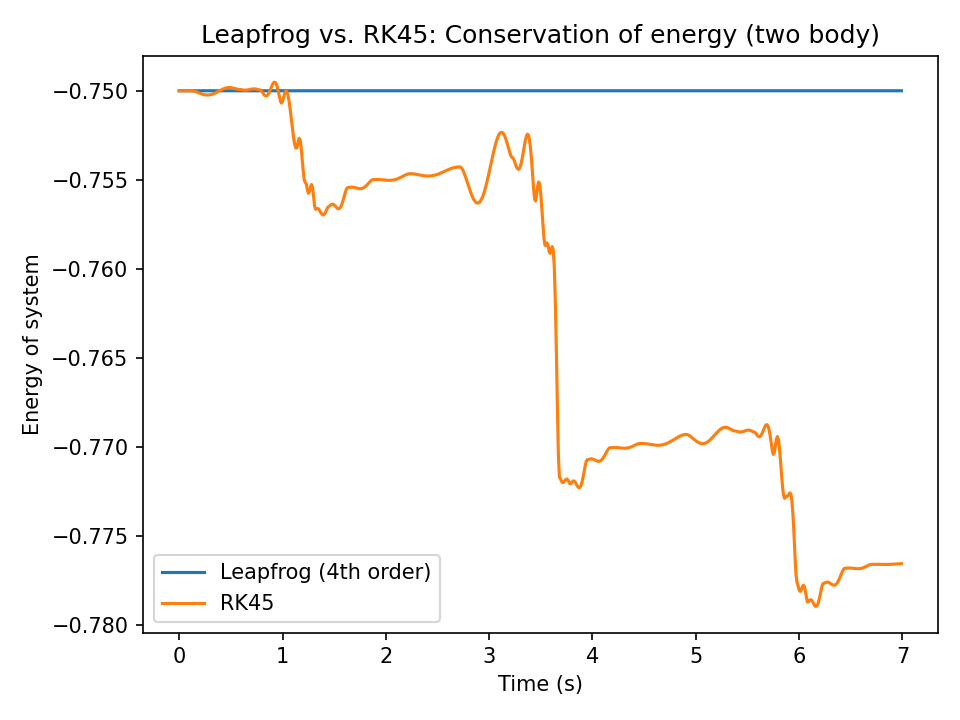

In [45]:
Image("images/twobody_leapfrog_vs_RK45.png")

Although the RK45 algorithm is significantly faster than the Yoshida/Leapfrog algorithm due to its adaptive stepping, it doesn't conserve energy nearly as well. This is a problem for running systems that are stable for long periods of time -- the leapfrog method is stable in energy, but RK45 will eventually decay or explode after a long runtime.

Let's compare these integrators with an animation as well:

In [46]:
%%capture
# initalize particles
mass_array = [1, 1]
position_array = [
    [0, 0],
    [1, 0]
]
velocity_array = 0.5*np.array([
    [0, -1],
    [0, 1]
])

# initialize the NBodyHandler
nbody = NBodyHandler(mass_array, position_array, velocity_array)

# create time arrays and solve using leapfrog4
tlist = np.arange(0,7,0.01)
t, vec_leapfrog = nbody.solve(tlist, method="Leapfrog4")
t, vec_RK45 = nbody.solve(tlist, method="RK45")

# plot
fig, axs = plt.subplots(1, 2, figsize=(8,4), dpi=200)

# keep initialize the plot which gets updated
points_leapfrog_arr = []
points_RK45_arr = []
pos_leapfrog_arr = []
pos_RK45_arr = []
for idx in range(0, len(mass_array)):
    point_leap = axs[0].plot(vec_leapfrog[2*idx,0], vec_leapfrog[2*idx+1,0], 
                        '-', label=rf"$m_{idx} = {mass_array[idx]}$")[0]
    point_RK45 = axs[1].plot(vec_RK45[2*idx,0], vec_RK45[2*idx+1,0], 
                        '-', label=rf"$m_{idx} = {mass_array[idx]}$")[0]
    points_leapfrog_arr.append(point_leap)
    points_RK45_arr.append(point_RK45)

    pos_leapfrog = axs[0].plot(vec_leapfrog[2*idx,0], vec_leapfrog[2*idx+1,0], '.k')[0]
    pos_RK45 = axs[1].plot(vec_leapfrog[2*idx,0], vec_leapfrog[2*idx+1,0], '.k')[0]
    pos_leapfrog_arr.append(pos_leapfrog)
    pos_RK45_arr.append(pos_RK45)

# make the animation
def update(frame):
    for idx in range(0, len(mass_array)):
        points_leapfrog_arr[idx].set_xdata(vec_leapfrog[2*idx, :frame])
        points_leapfrog_arr[idx].set_ydata(vec_leapfrog[2*idx+1, :frame])
        points_RK45_arr[idx].set_xdata(vec_RK45[2*idx, :frame])
        points_RK45_arr[idx].set_ydata(vec_RK45[2*idx+1, :frame])

        pos_leapfrog_arr[idx].set_xdata([vec_leapfrog[2*idx, frame]])
        pos_leapfrog_arr[idx].set_ydata([vec_leapfrog[2*idx+1, frame]])
        pos_RK45_arr[idx].set_xdata([vec_RK45[2*idx, frame]])
        pos_RK45_arr[idx].set_ydata([vec_RK45[2*idx+1, frame]])
    return points_leapfrog_arr, points_RK45_arr, pos_leapfrog_arr, pos_RK45_arr

axs[0].set_xlabel("x")
axs[1].set_xlabel("x")
axs[0].set_ylabel("y")
axs[1].set_ylabel("y")
axs[0].set_title("Leapfrog")
axs[1].set_title("RK45")
axs[0].set_xlim(-0.25, 1.25)
axs[1].set_xlim(-0.25, 1.25)
axs[0].set_ylim(-0.4, 0.4)
axs[1].set_ylim(-0.4, 0.4)
fig.suptitle("Two body: Leapfrog versus RK45")

fig.tight_layout()

anim.FuncAnimation(fig=fig, func=update, frames=len(tlist),
                   repeat=True, blit=False
                   ).save(
                        "images/two_body_leapfrog_rk45.mp4", 
                        writer="ffmpeg", fps=60
                        )

In [47]:
Video("images/two_body_leapfrog_rk45.mp4")

After a long enough time, we can see the RK45 integrator begin to fail noticeably, while the Yoshida/leapfrog integrator keeps the Hamiltonian constant.

## Chaos

For two bodies, we have exact elementary solutions for the motion of the bodies. Therefore, the 2-body simulation is not chaotic. As soon as we have three or more bodies, this changes. 

Below is a toy problem demonstrating this effect. It is a four body system with a extra test mass with a tenth of the mass of the other bodies added. The top left plot is the undisturbed case, whereas the top right plot corresponds to the case where the extra mass is given a velocity increase (in each coordinate direction) of 1e-3. The bottom plot shows that the relative position difference between the two solutions increases with time, although it scales differently for each coordinate.

In [48]:
%%capture
# initalize particles
mass_array = [1, 1, 1, 1, 0.1]
position_array = [
    [-1, 0],
    [1, 0],
    [0, 1],
    [0, -1],
    [1.5, 1.5]
]
velocity_array = 0.5*np.array([
    [0, -1],
    [0, 1],
    [-1, 0],
    [1, 0],
    [1.5, -1.5]
])

# define perturbation
eps = 1e-3
epsilon_arr = np.zeros((len(mass_array), 2))
epsilon_arr[-1][:] = eps

# initialize the NBodyHandler
nbody1 = NBodyHandler(mass_array, position_array, velocity_array)
nbody2 = NBodyHandler(mass_array, position_array, velocity_array+epsilon_arr)

# create time arrays and solve using leapfrog4
tlist = np.arange(0,6,0.01)
t, vec1 = nbody1.solve(tlist, method="Leapfrog4")
t, vec2 = nbody2.solve(tlist, method="Leapfrog4")

# calculate the difference in position
diff = np.zeros((len(mass_array), len(t)))
for idx in range(0, len(mass_array)):
    diffx = np.abs(vec2[2*idx, :] - vec1[2*idx, :])
    diffy = np.abs(vec2[2*idx + 1, :] - vec1[2*idx + 1, :])
    diff[idx, :] = np.sqrt(diffx**2 + diffy**2)

# plot with a mosaic : two plots on top, one on bottom
fig, axs = plt.subplot_mosaic(
    [
        ["unperturbed", "perturbed"],
        ["plot", "plot"]
    ],
    figsize=(8,8), dpi=100)

# keep initialize the plot which gets updated
points1_arr = []
points2_arr = []
pos1_arr = []
pos2_arr = []
plot_arr = []
for idx in range(0, len(mass_array)):

    if idx == len(mass_array)-1:
        label=r"$m_{test}$"+rf"$ = {mass_array[idx]}$"
    else:
        label=rf"$m_{idx} = {mass_array[idx]}$"

    point1 = axs["unperturbed"].plot(vec1[2*idx,0], vec1[2*idx+1,0], 
                        '-', label=label)[0]
    point2 = axs["perturbed"].plot(vec2[2*idx,0], vec2[2*idx+1,0], 
                        '-', label=label)[0]
    points1_arr.append(point1)
    points2_arr.append(point2)

    pos1 = axs["unperturbed"].plot(vec1[2*idx,0], vec1[2*idx+1,0], '.k')[0]
    pos2 = axs["perturbed"].plot(vec2[2*idx,0], vec2[2*idx+1,0], '.k')[0]
    pos1_arr.append(pos1)
    pos2_arr.append(pos2)

    plot = axs["plot"].plot(t[0], diff[idx, 0],
                            '-', label=label)[0]
    plot_arr.append(plot)


# make the animation
def update(frame):
    for idx in range(0, len(mass_array)):
        points1_arr[idx].set_xdata(vec1[2*idx, :frame])
        points1_arr[idx].set_ydata(vec1[2*idx+1, :frame])
        points2_arr[idx].set_xdata(vec2[2*idx, :frame])
        points2_arr[idx].set_ydata(vec2[2*idx+1, :frame])

        pos1_arr[idx].set_xdata([vec1[2*idx, frame]])
        pos1_arr[idx].set_ydata([vec1[2*idx+1, frame]])
        pos2_arr[idx].set_xdata([vec2[2*idx, frame]])
        pos2_arr[idx].set_ydata([vec2[2*idx+1, frame]])

        plot_arr[idx].set_xdata(t[:frame])
        plot_arr[idx].set_ydata(diff[idx, :frame])
    return points1_arr, pos1_arr, points2_arr, pos2_arr, plot_arr

axs["unperturbed"].set_xlabel("x")
axs["unperturbed"].set_ylabel("y")
axs["unperturbed"].set_xlim(-2.25, 2.25)
axs["unperturbed"].set_ylim(-2.25, 2.25)

axs["perturbed"].set_xlabel("x")
axs["perturbed"].set_ylabel("y")
axs["perturbed"].set_xlim(-2.25, 2.25)
axs["perturbed"].set_ylim(-2.25, 2.25)

axs["unperturbed"].set_title("Unperturbed velocities")
axs["perturbed"].set_title(f"Test mass velocity + {eps}")
axs["plot"].set_title("Position diff between solutions")
#axs["unperturbed"].legend()

axs["plot"].set_xlabel("Time")
axs["plot"].set_ylabel(r"$\Delta$ position")
axs["plot"].set_ylim(0, np.max(diff))
axs["plot"].set_xlim(0, t[-1])
axs["plot"].legend()

fig.suptitle("Chaos: small velocity perturbation")

fig.tight_layout()

anim.FuncAnimation(fig=fig, func=update, frames=len(tlist),
                   repeat=True, blit=False
                   ).save(
                        "images/chaos_velocity.mp4", 
                        writer="ffmpeg", fps=60
                        )

In [49]:
Video("images/chaos_velocity.mp4")

This system is clearly chaotic -- a small velocity perturbation to the test mass results in growing difference between the solutions.

Let's also try to look at Lyapunov exponents. We can look at how chaos grows over longer timeframes, although it's too time-expensive to animate it for that long. Instead, we can simply make a plot:

In [50]:
%%capture
# initalize particles
mass_array = [1, 1, 1, 1, 0.1]
position_array = [
    [-1, 0],
    [1, 0],
    [0, 1],
    [0, -1],
    [1.5, 1.5]
]
velocity_array = 0.5*np.array([
    [0, -1],
    [0, 1],
    [-1, 0],
    [1, 0],
    [1.5, -1.5]
])

# define perturbation
eps = 1e-3
epsilon_arr = np.zeros((len(mass_array), 2))
epsilon_arr[-1][:] = eps

# initialize the NBodyHandler
nbody1 = NBodyHandler(mass_array, position_array, velocity_array)
nbody2 = NBodyHandler(mass_array, position_array, velocity_array+epsilon_arr)

# create time arrays and solve using leapfrog4
tlist = np.arange(0,60,0.01)
t, vec1 = nbody1.solve(tlist, method="Leapfrog4")
t, vec2 = nbody2.solve(tlist, method="Leapfrog4")

# calculate the difference in position
diff = np.zeros((len(mass_array), len(t)))
for idx in range(0, len(mass_array)):
    diffx = np.abs(vec2[2*idx, :] - vec1[2*idx, :])
    diffy = np.abs(vec2[2*idx + 1, :] - vec1[2*idx + 1, :])
    diff[idx, :] = np.sqrt(diffx**2 + diffy**2)

# plot with a mosaic : two plots on top, one on bottom
fig, ax = plt.subplots(dpi=150)

for idx in range(0,len(mass_array)):

    if idx == len(mass_array)-1:
        label=r"$m_{test}$"+rf"$ = {mass_array[idx]}$"
    else:
        label=rf"$m_{idx} = {mass_array[idx]}$"

    ax.semilogy(t, diff[idx, :], '-', label=label)

ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel(r"$\Delta$ position")
ax.set_title(f"Chaos in the five-body problem: \n test mass velocity perturbation = {eps}")

fig.savefig("images/chaos_velocity_lyapunov.png", dpi=300)

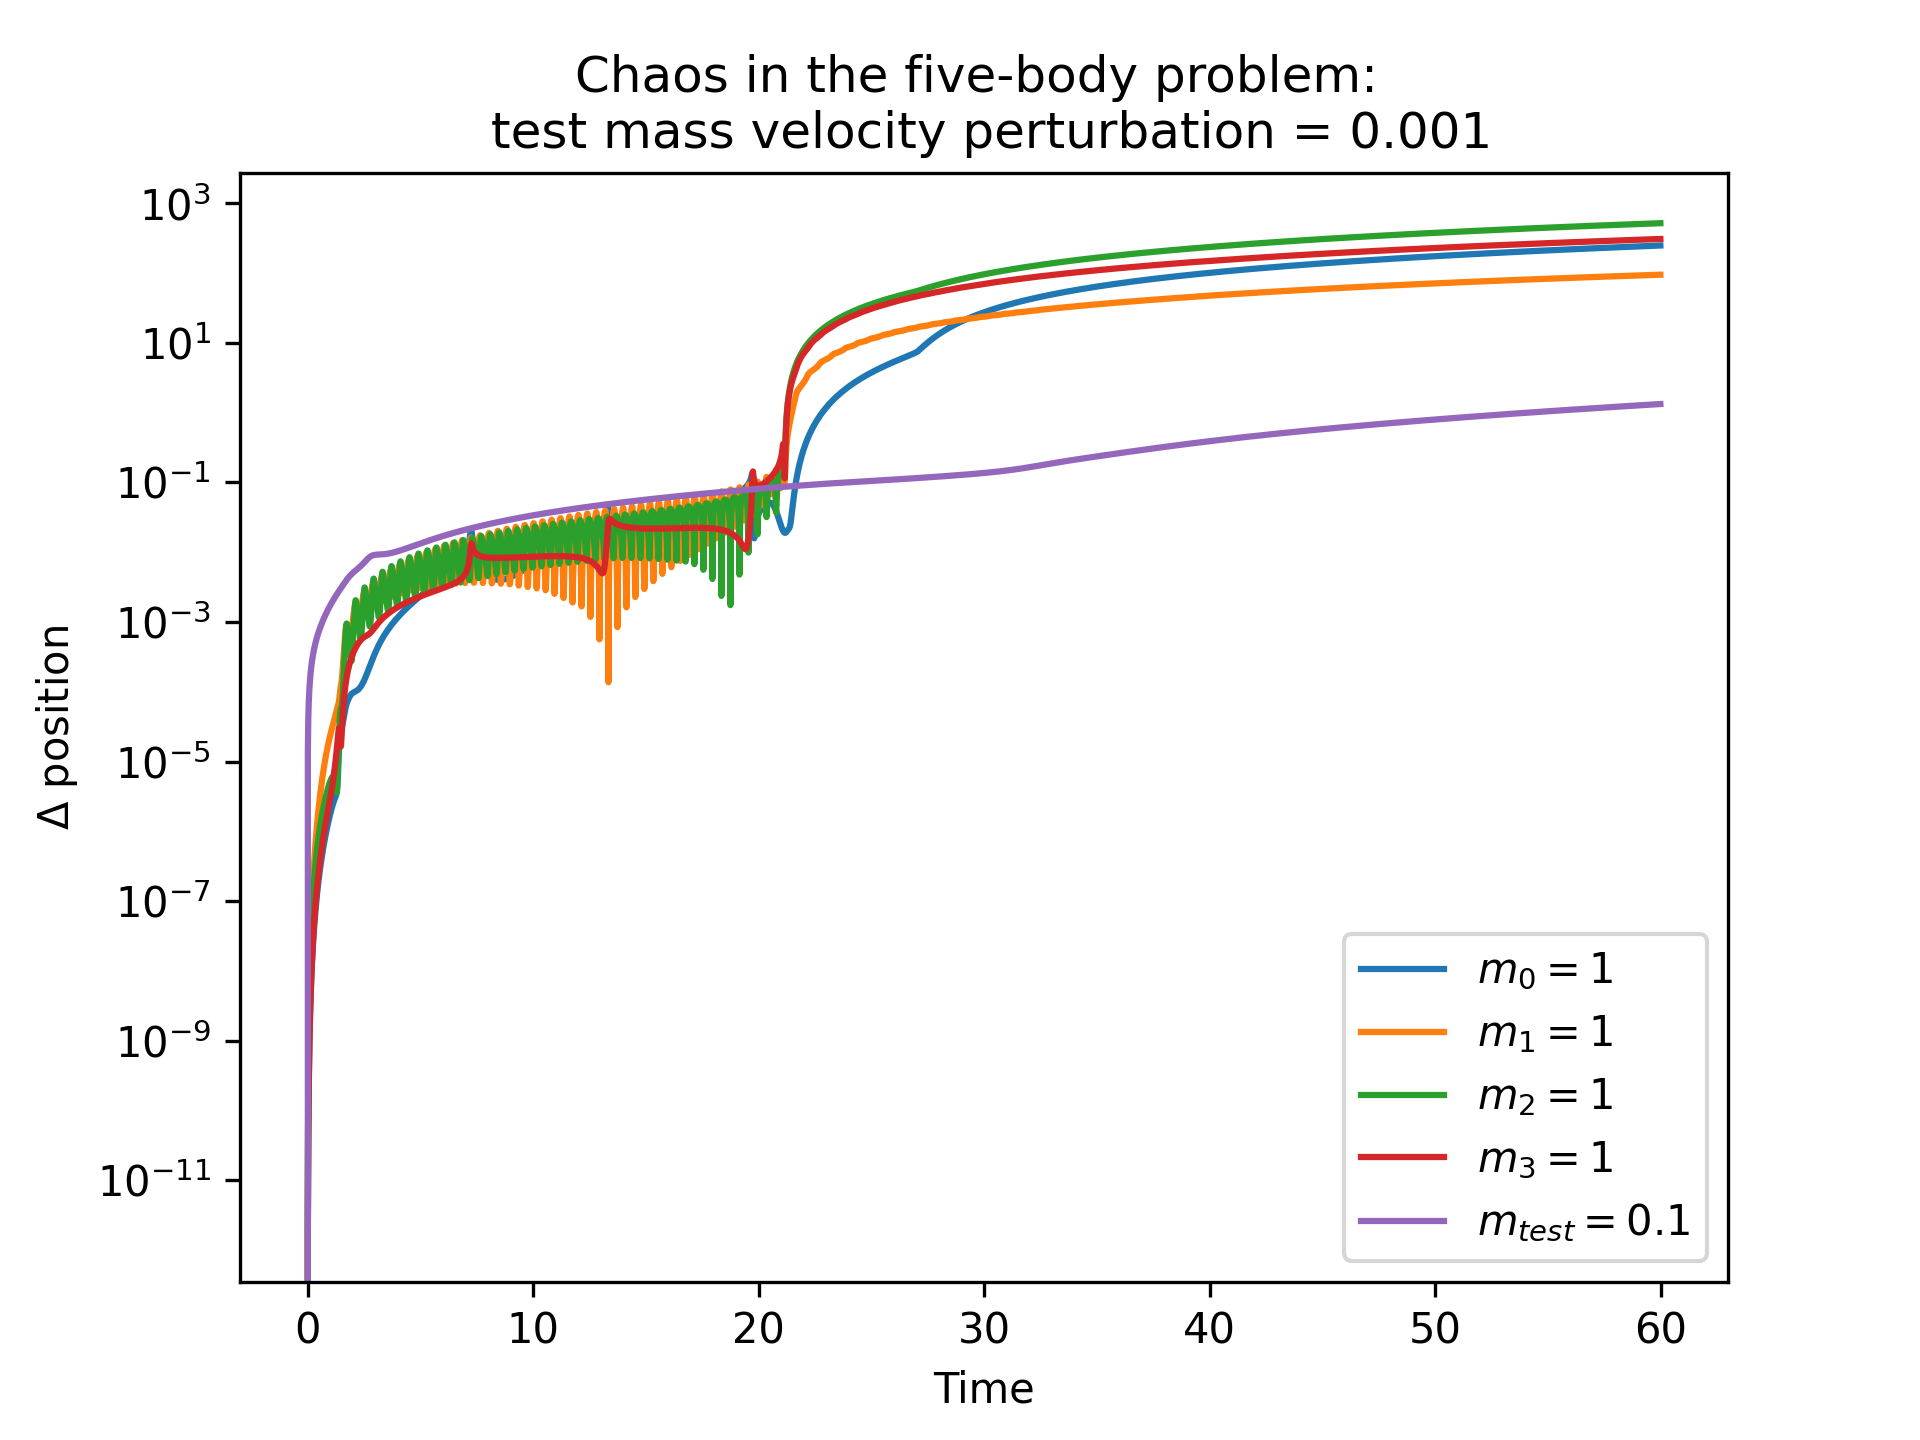

In [51]:
Image("images/chaos_velocity_lyapunov.png")

In other problems (such as the DDP), we would expect this curve to look approximately linear in semilog space (which is what is plotted above). The slope of this line would be the Lyapunov exponent. In n-body simulations, chaos is obviously present but not nearly as simple.  The systems goes through periods of relative stability and instability -- sometimes the system is less chaotic, but occasionally it will enter periods of high chaos.

These chaotic events are usually when masses pass close to each other -- a very small position difference can lead to huge accelerations when the masses are extremely close. However, when the masses are far from each other, the system is highly stable under perturbations.